In [2]:
from keras.applications import VGG16
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers, optimizers

#setting the paths
baseDir = '/home/chen/LiChiChang/2020SpringThesis/dataset/CatDog/shrink'
trainDir = os.path.join(baseDir, 'train')
validationDir = os.path.join(baseDir, 'validation')
testDir = os.path.join(baseDir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batchSize = 20

#the pretrain model from open sources
conv_base = VGG16(weights='imagenet',include_top=False,input_shape=(150, 150, 3))

#get the dataset features from this model, and use it to train our model.
def extractFeature(dir, sampleCount):
    features = np.zeros(shape=(sampleCount,4,4,512))
    labels = np.zeros(shape=(sampleCount))
    generator = datagen.flow_from_directory(dir, target_size=(150,150), batch_size=batchSize, class_mode='binary')
    i = 0
    for inputsBatch, labelsBatch in generator:
        featuresBatch = conv_base.predict(inputsBatch)
        features[i * batchSize: (i + 1)*batchSize] = featuresBatch
        labels[i * batchSize: (i + 1)*batchSize] = labelsBatch
        i += 1
        if i*batchSize >= sampleCount:
            break
    return features, labels

trainFeatures, trainLabels = extractFeature(trainDir, 2000)
validationFeatures, validationLabels = extractFeature(validationDir, 1000)
testFeatures, testLabels = extractFeature(testDir, 1000)

trainFeatures = np.reshape(trainFeatures, (2000, 4*4*512))
validationFeatures = np.reshape(validationFeatures, (1000, 4*4*512))
testFeatures = np.reshape(testFeatures, (1000, 4*4*512))

#use the features to train our model
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='binary_crossentropy', metrics=['acc'])

history = model.fit(trainFeatures, trainLabels, epochs=30, batch_size=20, validation_data=(validationFeatures,validationLabels))

Found 2000 images belonging to 2 classes.

Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 400us/step - loss: 0.6311 - acc: 0.6445 - val_loss: 0.4568 - val_acc: 0.8220
Epoch 2/30
2000/2000 [==============================] - 1s 352us/step - loss: 0.4459 - acc: 0.7915 - val_loss: 0.3714 - val_acc: 0.8600
Epoch 3/30
2000/2000 [==============================] - 1s 350us/step - loss: 0.3718 - acc: 0.8390 - val_loss: 0.3286 - val_acc: 0.8790
Epoch 4/30
2000/2000 [==============================] - 1s 356us/step - loss: 0.3286 - acc: 0.8665 - val_loss: 0.3022 - val_acc: 0.8820
Epoch 5/30
2000/2000 [==============================] - 1s 354us/step - loss: 0.2821 - acc: 0.8840 - val_loss: 0.2839 - val_acc: 0.8910
Epoch 6/30
2000/2000 [=============================

the VGG model:
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 12

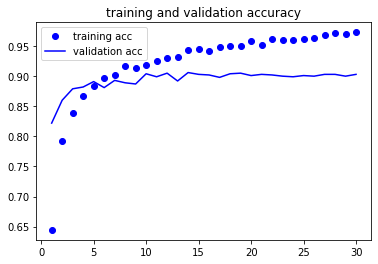

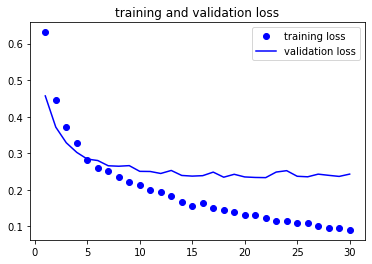

In [4]:
#plot and summary
print("the VGG model:")
conv_base.summary()
print("my model:")
model.summary()

import matplotlib.pyplot as plt

acc = history.history['acc']
validationAcc = history.history['val_acc']

loss = history.history['loss']
validationLoss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, validationAcc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, validationLoss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()